In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('weatherAUS 2.csv')

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [5]:
df.shape

(145460, 23)

Replacing the target from object to int

In [6]:
df['RainToday'].replace({'Yes':1,'No':0},inplace=True)
df['RainTomorrow'].replace({'Yes':1,'No':0},inplace=True)

Plotting Heatmap to find the correlation between the data

<AxesSubplot:>

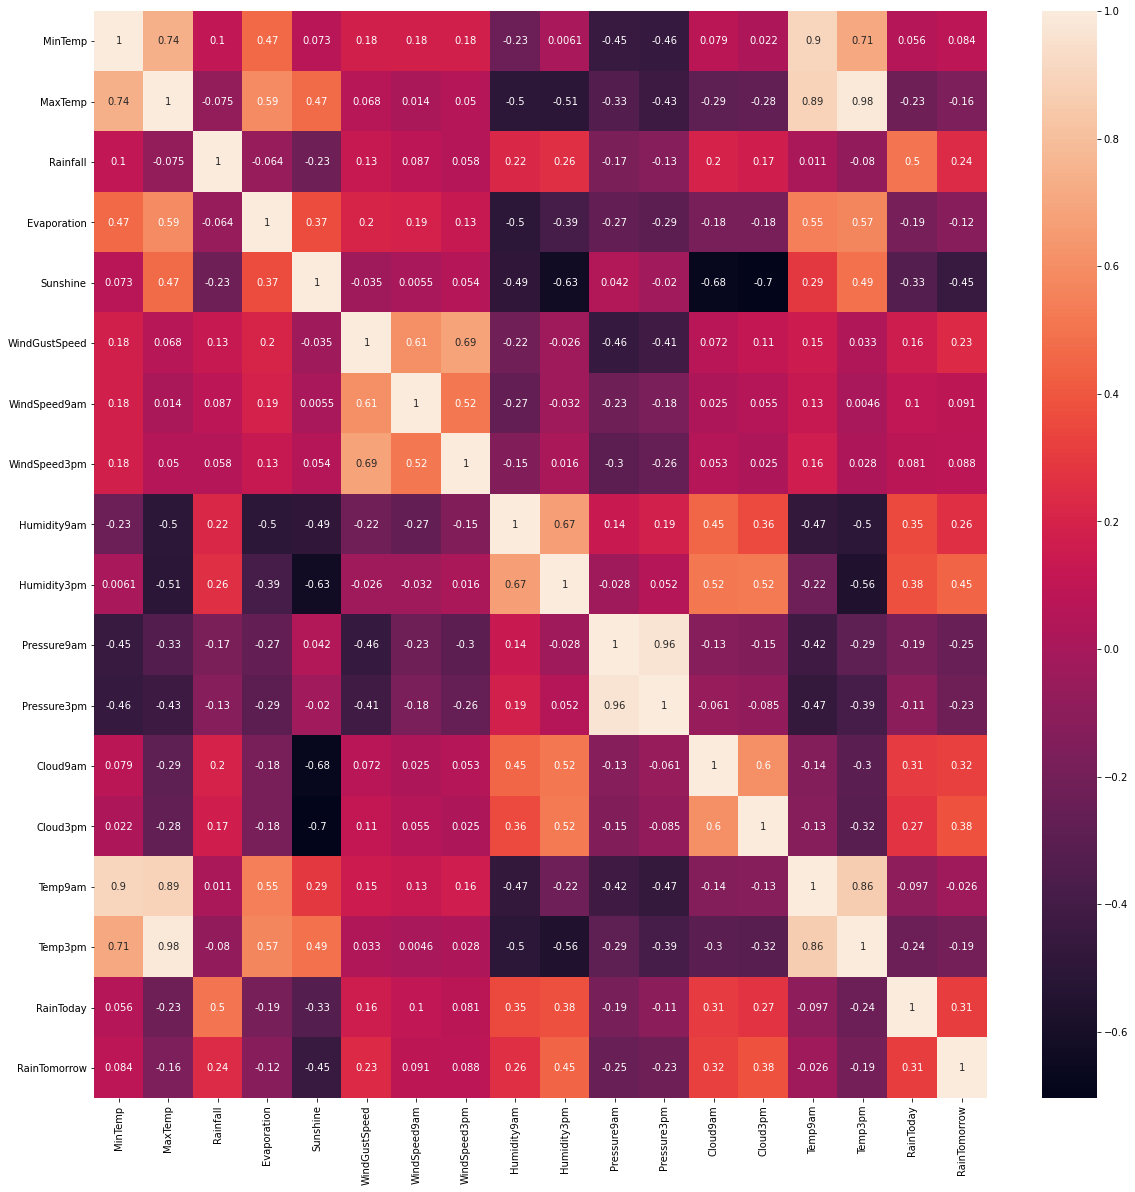

In [7]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

# Feature selection

In [15]:
important_num_cols = list(df.corr()["RainTomorrow"][(df.corr()["RainTomorrow"]>0.20) | 
                                                 (df.corr()["RainTomorrow"]<-0.20)].index)

In [16]:
important_num_cols

['Rainfall',
 'Sunshine',
 'WindGustSpeed',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'RainToday',
 'RainTomorrow']

In [20]:
df_num=df[important_num_cols]

In [18]:
obj=df.select_dtypes('object')

In [21]:
df=pd.concat([df_num,obj],axis=1)

# Treating null values

In [22]:
df_nullcount=pd.DataFrame(df.isnull().sum(),columns=['Nullcount'])
df_nullpercentage=pd.DataFrame((df.isnull().sum())*100/len(df),columns=['Percentage'])
df_null=pd.concat([df_nullcount,df_nullpercentage],axis=1)

In [23]:
df_null.sort_values(['Percentage'],ascending=False)

,Nullcount,Percentage
Sunshine,69835,48.009762
Cloud3pm,59358,40.807095
Cloud9am,55888,38.421559
Pressure9am,15065,10.356799
Pressure3pm,15028,10.331363
WindDir9am,10566,7.263853
WindGustDir,10326,7.098859
WindGustSpeed,10263,7.055548
Humidity3pm,4507,3.098446
WindDir3pm,4228,2.906641


Removing the null values if its less than 5%

In [25]:
df.dropna(subset=['Humidity3pm','WindDir3pm','RainTomorrow','Rainfall','RainToday','WindDir9am','Humidity9am'
                  ,'WindGustDir','WindGustSpeed'],inplace=True)

In [26]:
df_nullcount=pd.DataFrame(df.isnull().sum(),columns=['Nullcount'])
df_nullpercentage=pd.DataFrame((df.isnull().sum())*100/len(df),columns=['Percentage'])
df_null=pd.concat([df_nullcount,df_nullpercentage],axis=1)
df_null.sort_values(['Percentage'],ascending=False)

,Nullcount,Percentage
Sunshine,55109,45.221351
Cloud3pm,46776,38.383457
Cloud9am,45430,37.278956
Pressure9am,8836,7.250646
Pressure3pm,8785,7.208797
Rainfall,0,0.000000
WindGustSpeed,0,0.000000
Humidity9am,0,0.000000
Humidity3pm,0,0.000000
RainToday,0,0.000000


Droping location since the data is widely spread doesn't contribute much to the dataset

In [27]:
df.drop(['Location'],inplace=True,axis=1)

In [28]:
df.describe()

,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow
count,121865.000000,66756.000000,121865.000000,121865.000000,121865.000000,113029.00000,113080.000000,76435.000000,75089.000000,121865.000000,121865.000000
mean,2.356368,7.726592,40.687343,67.684306,50.798556,1017.42427,1015.049032,4.422856,4.493801,0.223764,0.220761
std,8.482396,3.776385,13.389708,19.058134,20.940680,7.03317,6.958036,2.876513,2.718086,0.416767,0.414761
min,0.000000,0.000000,7.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5.000000,31.000000,56.000000,36.000000,1012.80000,1010.300000,1.000000,2.000000,0.000000,0.000000
50%,0.000000,8.600000,39.000000,69.000000,51.000000,1017.40000,1015.000000,5.000000,5.000000,0.000000,0.000000
75%,0.800000,10.700000,48.000000,82.000000,65.000000,1022.10000,1019.700000,7.000000,7.000000,0.000000,0.000000
max,367.600000,14.500000,135.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,1.000000,1.000000


Since the max value is closer to the mean the null values are replaced with mean

In [29]:
df['Sunshine']=df['Sunshine'].fillna(df['Sunshine'].mean())
df['Cloud9am']=df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm']=df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
df['Pressure9am']=df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm']=df['Pressure3pm'].fillna(df['Pressure3pm'].mean())


In [30]:
df_nullcount=pd.DataFrame(df.isnull().sum(),columns=['Nullcount'])
df_nullpercentage=pd.DataFrame((df.isnull().sum())*100/len(df),columns=['Percentage'])
df_null=pd.concat([df_nullcount,df_nullpercentage],axis=1)
df_null.sort_values(['Percentage'],ascending=False)

,Nullcount,Percentage
Rainfall,0,0.0
Sunshine,0,0.0
WindGustSpeed,0,0.0
Humidity9am,0,0.0
Humidity3pm,0,0.0
Pressure9am,0,0.0
Pressure3pm,0,0.0
Cloud9am,0,0.0
Cloud3pm,0,0.0
RainToday,0,0.0


All the missing values has been treated

# Fine tuning 

Since the date is widely spread converting it into seasons based on australian weather

In [31]:
import datetime
for i in df['Date']:
    datem = datetime.datetime.strptime(i, "%Y-%m-%d")
    i = datem.month
    if i in [1,2,12]:
        df['Season']='Summer'
    elif i in [6,7,8]:
        df['Season']='Winter'
    elif i in [9,10,11]:
        df['Season']='spring'
    else:
        df['Season']='Autumn'

df.head()

,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,Date,WindGustDir,WindDir9am,WindDir3pm,Season
0,0.6,7.726592,44.0,71.0,22.0,1007.7,1007.1,8.000000,4.493801,0.0,0.0,2008-12-01,W,W,WNW,Winter
1,0.0,7.726592,44.0,44.0,25.0,1010.6,1007.8,4.422856,4.493801,0.0,0.0,2008-12-02,WNW,NNW,WSW,Winter
2,0.0,7.726592,46.0,38.0,30.0,1007.6,1008.7,4.422856,2.000000,0.0,0.0,2008-12-03,WSW,W,WSW,Winter
3,0.0,7.726592,24.0,45.0,16.0,1017.6,1012.8,4.422856,4.493801,0.0,0.0,2008-12-04,NE,SE,E,Winter
4,1.0,7.726592,41.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,0.0,0.0,2008-12-05,W,ENE,NW,Winter


Since date has been converted into seasons data column can be dropped

In [32]:
df.drop(['Date'],inplace=True,axis=1)

In [33]:
df.dtypes

Rainfall         float64
Sunshine         float64
WindGustSpeed    float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
RainToday        float64
RainTomorrow     float64
WindGustDir       object
WindDir9am        object
WindDir3pm        object
Season            object
dtype: object

In [35]:
df1=df.copy()

In [36]:
df1.shape

(121865, 15)

In [37]:
y=df1['RainTomorrow']
x=pd.DataFrame(df1.drop(['RainTomorrow'],inplace=True,axis=1))

In [38]:
x=pd.DataFrame(df1)

In [39]:
y=pd.DataFrame(df['RainTomorrow'])

To avoid data leakage Training and test data are treated separately 

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [41]:
x_train.shape

(85305, 14)

In [42]:
x_train.head()

,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday,WindGustDir,WindDir9am,WindDir3pm,Season
62291,0.0,11.700000,48.0,87.0,59.0,1021.6,1019.6,6.0,2.0,0.0,ESE,NE,E,Winter
117654,0.0,13.000000,37.0,74.0,54.0,1007.8,1008.3,1.0,1.0,0.0,W,NW,W,Winter
21326,0.0,2.800000,30.0,58.0,59.0,1021.3,1019.2,6.0,7.0,0.0,NE,ESE,NE,Winter
42540,36.2,7.726592,37.0,86.0,75.0,1028.5,1027.0,8.0,2.0,1.0,W,SW,SSW,Winter
70598,0.0,8.900000,37.0,75.0,28.0,1024.4,1019.2,6.0,1.0,0.0,N,NNE,N,Winter


In [43]:
x_train.reset_index(inplace=True)

In [44]:
y_train.shape

(85305, 1)

In [45]:
x_train=pd.get_dummies(x_train)

In [46]:
x_train.head()

,index,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,Season_Winter
0,62291,0.0,11.700000,48.0,87.0,59.0,1021.6,1019.6,6.0,2.0,...,0,0,0,0,0,0,0,0,0,1
1,117654,0.0,13.000000,37.0,74.0,54.0,1007.8,1008.3,1.0,1.0,...,0,0,0,0,0,0,1,0,0,1
2,21326,0.0,2.800000,30.0,58.0,59.0,1021.3,1019.2,6.0,7.0,...,0,0,0,0,0,0,0,0,0,1
3,42540,36.2,7.726592,37.0,86.0,75.0,1028.5,1027.0,8.0,2.0,...,0,0,0,0,1,0,0,0,0,1
4,70598,0.0,8.900000,37.0,75.0,28.0,1024.4,1019.2,6.0,1.0,...,0,0,0,0,0,0,0,0,0,1


In [47]:
x_train_cat=x_train.select_dtypes(exclude='float')

In [48]:
x_train_cat.head()

,index,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,Season_Winter
0,62291,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,117654,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,21326,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,42540,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,70598,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [49]:
x_train_num=x_train.select_dtypes(include='float')

In [50]:
x_train_num.head()

,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday
0,0.0,11.700000,48.0,87.0,59.0,1021.6,1019.6,6.0,2.0,0.0
1,0.0,13.000000,37.0,74.0,54.0,1007.8,1008.3,1.0,1.0,0.0
2,0.0,2.800000,30.0,58.0,59.0,1021.3,1019.2,6.0,7.0,0.0
3,36.2,7.726592,37.0,86.0,75.0,1028.5,1027.0,8.0,2.0,1.0
4,0.0,8.900000,37.0,75.0,28.0,1024.4,1019.2,6.0,1.0,0.0


# Data Preprocessing

In [51]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
rs=RobustScaler()
ss=StandardScaler()

In [52]:
x_train_num_rs=rs.fit_transform(x_train_num)

In [53]:
x_train_num_rs=pd.DataFrame(x_train_num_rs,columns=[x_train_num])

In [54]:
x_train_num_rs.head()

,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday
0,0.00,3.120295,0.529412,0.692308,0.275862,0.491262,0.529182,0.525715,-1.2469,0.0
1,0.00,4.141178,-0.117647,0.192308,0.103448,-1.132267,-0.784771,-1.140952,-1.7469,0.0
2,0.00,-3.868826,-0.529412,-0.423077,0.275862,0.455968,0.482671,0.525715,1.2531,0.0
3,45.25,0.000000,-0.117647,0.653846,0.827586,1.303027,1.389647,1.192381,-1.2469,1.0
4,0.00,0.921471,-0.117647,0.230769,-0.793103,0.820674,0.482671,0.525715,-1.7469,0.0


In [55]:
x_train_num_ss=ss.fit_transform(x_train_num_rs)

In [56]:
x_train_num_ss=pd.DataFrame(x_train_num_ss,columns=[x_train_num])

In [57]:
x_train_num_ss.head()

,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday
0,-0.281058,1.425255,0.544135,1.012612,0.389872,0.614839,0.676934,0.690166,-1.172138,-0.538008
1,-0.281058,1.890708,-0.278673,0.331352,0.151342,-1.419032,-1.006461,-1.505986,-1.641607,-0.538008
2,-0.281058,-1.761306,-0.802278,-0.507122,0.389872,0.570625,0.617344,0.690166,1.175206,-0.538008
3,4.058695,0.002614,-0.278673,0.960207,1.153168,1.631775,1.779333,1.568627,-1.172138,1.858710
4,-0.281058,0.422742,-0.278673,0.383756,-1.089013,1.027509,0.617344,0.690166,-1.641607,-0.538008


In [58]:
x_train=pd.concat([x_train_num_ss,x_train_cat],axis=1)

In [59]:
x_train.drop('index',axis=1,inplace=True)

In [63]:
x_train.shape

(85305, 59)

Treating the test data

In [60]:
x_test=pd.get_dummies(x_test)

In [64]:
x_test.head()

,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,Season_Winter
139300,6.0,8.000000,39.0,79.0,64.0,1006.9,1004.0,7.000000,7.000000,1.0,...,0,0,0,0,0,0,1,0,0,1
107257,0.0,11.400000,57.0,52.0,40.0,1010.0,1008.9,1.000000,1.000000,0.0,...,0,0,0,0,1,0,0,0,0,1
51445,2.2,7.726592,24.0,84.0,60.0,1029.0,1026.4,4.422856,4.493801,1.0,...,0,0,0,0,0,0,0,0,0,1
117419,0.0,13.100000,35.0,48.0,26.0,1015.1,1012.9,4.422856,4.493801,0.0,...,0,0,0,0,0,0,0,0,1,1
66297,0.0,10.300000,35.0,68.0,48.0,1020.5,1019.4,7.000000,7.000000,0.0,...,0,0,0,1,0,0,0,0,0,1


In [65]:
x_test.reset_index(inplace=True)

In [66]:
x_test_cat=x_test.select_dtypes(exclude='float')

In [67]:
x_test_cat

,index,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,Season_Winter
0,139300,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
1,107257,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,51445,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,117419,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,66297,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36555,82021,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
36556,92060,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
36557,94292,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
36558,125600,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [68]:
x_test_num=x_test.select_dtypes(include='float')

In [69]:
x_test_num.head()

,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday
0,6.0,8.000000,39.0,79.0,64.0,1006.9,1004.0,7.000000,7.000000,1.0
1,0.0,11.400000,57.0,52.0,40.0,1010.0,1008.9,1.000000,1.000000,0.0
2,2.2,7.726592,24.0,84.0,60.0,1029.0,1026.4,4.422856,4.493801,1.0
3,0.0,13.100000,35.0,48.0,26.0,1015.1,1012.9,4.422856,4.493801,0.0
4,0.0,10.300000,35.0,68.0,48.0,1020.5,1019.4,7.000000,7.000000,0.0


In [70]:
x_test_num_rs=rs.fit_transform(x_test_num)

In [71]:
x_test_num_rs=pd.DataFrame(x_test_num_rs,columns=[x_test_num])

In [72]:
x_test_num_rs.shape

(36560, 10)

In [73]:
x_test_num_ss=ss.fit_transform(x_test_num_rs)

In [74]:
x_test_num_ss=pd.DataFrame(x_test_num_ss,columns=[x_test_num])

In [83]:
x_test=pd.concat([x_test_num_ss,x_test_cat],axis=1)

In [88]:
x_test.drop('index',inplace=True,axis=1)

# Logistic Regression

In [89]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [90]:
clf=lr.fit(x_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [91]:
from sklearn.metrics import classification_report

In [92]:
y_pred=clf.predict(x_test)

In [93]:
cr=classification_report(y_pred,y_test)
print(cr)

              precision    recall  f1-score   support

         0.0       0.95      0.87      0.91     30920
         1.0       0.51      0.72      0.60      5640

    accuracy                           0.85     36560
   macro avg       0.73      0.80      0.75     36560
weighted avg       0.88      0.85      0.86     36560



In [94]:
from sklearn.metrics import confusion_matrix

In [95]:
cm=confusion_matrix(y_pred,y_test)

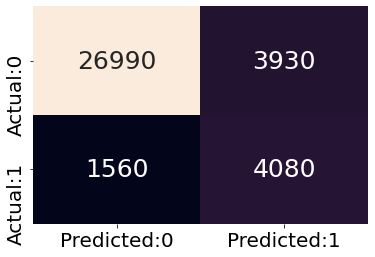

In [96]:
conf_mat=pd.DataFrame(data=cm,index=['Actual:0','Actual:1'],columns=['Predicted:0','Predicted:1'])
sns.heatmap(conf_mat,annot=True,annot_kws={'size':25},cbar=False,fmt='d')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [97]:
from sklearn.metrics import cohen_kappa_score

In [98]:
ck=cohen_kappa_score(y_pred,y_test)
ck

0.508884947853049

The Cohen's Kappa score gives a true picture regarding the model.The above score suggests that the logistic regression model is 50.88% better compared to the null model.For a good model,the Cohen's Kappa score should atleast be 50%.Thus, it can be inferred that there is a scope for further improvement of the logistic regression model.

# K nearest neighbor

In [99]:
from sklearn.neighbors import KNeighborsClassifier

In [100]:
knn_model=KNeighborsClassifier()
knn_model=knn_model.fit(x_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [101]:
y_pred=knn_model.predict(x_test)

Classification Report

In [102]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.86      0.93      0.90     28550
         1.0       0.67      0.48      0.56      8010

    accuracy                           0.83     36560
   macro avg       0.76      0.71      0.73     36560
weighted avg       0.82      0.83      0.82     36560



Accuracy of 83% is acheived

In [103]:
cm=confusion_matrix(y_pred,y_test)

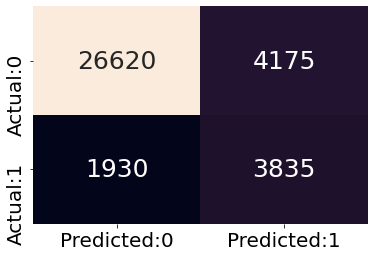

In [104]:
conf_mat=pd.DataFrame(data=cm,index=['Actual:0','Actual:1'],columns=['Predicted:0','Predicted:1'])
sns.heatmap(conf_mat,annot=True,annot_kws={'size':25},cbar=False,fmt='d')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

# Decision Tree

In [105]:
from sklearn.tree import DecisionTreeClassifier

In [106]:
dtc=DecisionTreeClassifier()

In [107]:
dtc=dtc.fit(x_train,y_train)

In [108]:
y_pred=dtc.predict(x_test)

In [109]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.87      0.83      0.85     28550
         1.0       0.48      0.55      0.51      8010

    accuracy                           0.77     36560
   macro avg       0.67      0.69      0.68     36560
weighted avg       0.78      0.77      0.78     36560



# Random Forest

In [110]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [111]:
rfc=rfc.fit(x_train,y_train)

<ipython-input-111-fcad24385820>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc=rfc.fit(x_train,y_train)


In [112]:
y_pred=rfc.predict(x_test)

In [113]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     28550
         1.0       0.75      0.51      0.61      8010

    accuracy                           0.86     36560
   macro avg       0.81      0.73      0.76     36560
weighted avg       0.85      0.86      0.84     36560



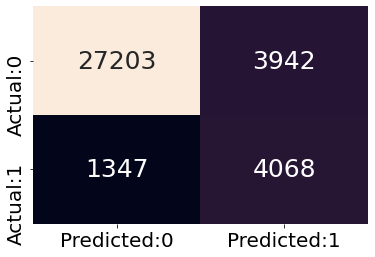

In [114]:
cm=confusion_matrix(y_pred,y_test)
conf_mat=pd.DataFrame(data=cm,index=['Actual:0','Actual:1'],columns=['Predicted:0','Predicted:1'])
sns.heatmap(conf_mat,annot=True,annot_kws={'size':25},cbar=False,fmt='d')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [115]:
TN=cm[0][0]
TP=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
cc=(TN+TP)*100/(TN+TP+FN+FP)
wc=(FN+FP)*100/(TN+TP+FN+FP)
sns=(TP)*100/(TP+FN)
spc=(TN)*100/(TN+FP)
a=(FP)*100/(TN+FP)
b=(FN)*100/(TP+FN)
print('Percentage of correctly classified records is',round(cc,2),'%')
print('Percentage of wrongly classified records is',round(wc,2),'%')
print('Sensitivity of the random forest model is',round(sns,2),'%')
print('Specificity of the random forest is',round(spc,2),'%')
print('Alpha error of the random forest is',round(a,2),'%')
print('Beta error of the random forest is',round(b,2),'%')

Percentage of correctly classified records is 85.53 %
Percentage of wrongly classified records is 14.47 %
Sensitivity of the random forest model is 75.12 %
Specificity of the random forest is 87.34 %
Alpha error of the random forest is 12.66 %
Beta error of the random forest is 24.88 %


In [116]:
fpr=FP/(FP+TN)
tpr=TP/(TP+FN)
tnr=TN/(TN+FP)
fnr=FN/(TP+FN)
print('True positive rate ', tpr)
print('False positive rate ', fpr)
print('True negative rate ', tnr)
print('False negative rate ', fnr)

True positive rate  0.7512465373961219
False positive rate  0.1265692727564617
True negative rate  0.8734307272435383
False negative rate  0.24875346260387812


In [117]:
from sklearn.metrics import roc_curve,roc_auc_score

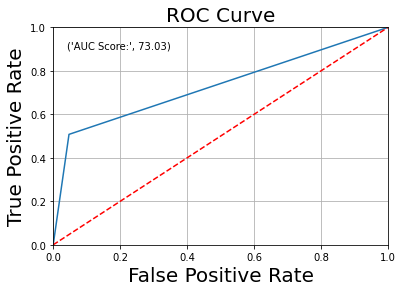

In [118]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.title('ROC Curve',fontsize=20)
plt.text(x=0.04,y=0.9,s=('AUC Score:',round(roc_auc_score(y_test,y_pred)*100,2)))
plt.grid(True)
plt.show()

# Hyperparameter Tuning

In [119]:
##Hyperparameter tuning
#number of trees in random forest
n_estimator=[int(x) for x in np.linspace(start=100,stop=1200,num=3)]

#number of features to consider in each split
max_features=['auto','sqrt']

#Maximun number of levels in trees
max_depth=[int(x) for x in np.linspace(5,30,num=3)]

#minimun number of sample required to split the node
min_samples_split=[2,5]

#minimum number of samples required for each leaf
min_samples_leaf=[1,2,5]

#method for selecting sampling for training each tree
bootstrap=[True,False]

In [120]:
#Creating a param grid
random_grid={'n_estimators': n_estimator,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split}
print(random_grid)

{'n_estimators': [100, 650, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 17, 30], 'min_samples_split': [2, 5]}


In [121]:
from sklearn.model_selection import GridSearchCV
rf_grid=GridSearchCV(estimator=rfc,param_grid=random_grid,cv=3,verbose=2,n_jobs=4)
rf_grid.fit(x_train,y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'max_depth': [5, 17, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 650, 1200]},
             verbose=2)

In [122]:
rf_grid.best_params_

{'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_split': 5,
 'n_estimators': 650}

In [123]:
rfc=RandomForestClassifier(n_estimators=650,max_depth=30,min_samples_split=5,max_features='sqrt')

In [124]:
rfc=rfc.fit(x_train,y_train)

<ipython-input-124-fcad24385820>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc=rfc.fit(x_train,y_train)


In [125]:
y_pred=rfc.predict(x_test)

In [126]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91     28550
         1.0       0.76      0.52      0.61      8010

    accuracy                           0.86     36560
   macro avg       0.82      0.73      0.76     36560
weighted avg       0.85      0.86      0.85     36560

